In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

health = pd.read_csv('cleaned_heart_2020.csv')

In [2]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [3]:
health.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'GenHealth_Number',
       'SleepGroups', 'BMIGroups'],
      dtype='object')

In [4]:
#convert yes/no columns to category type
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth_Number',
       'SleepGroups', 'BMIGroups']
for i in columns:
    health[i] = health[i].astype('category')

In [5]:
health.dtypes

HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
GenHealth_Number    category
SleepGroups         category
BMIGroups           category
dtype: object

In [6]:
health.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
health.isnull().sum()

HeartDisease           0
BMI                    0
Smoking                0
AlcoholDrinking        0
Stroke                 0
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
AgeCategory            0
Race                   0
Diabetic            9340
PhysicalActivity       0
GenHealth              0
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
GenHealth_Number       0
SleepGroups            0
BMIGroups              0
dtype: int64

In [8]:
health.HeartDisease.value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

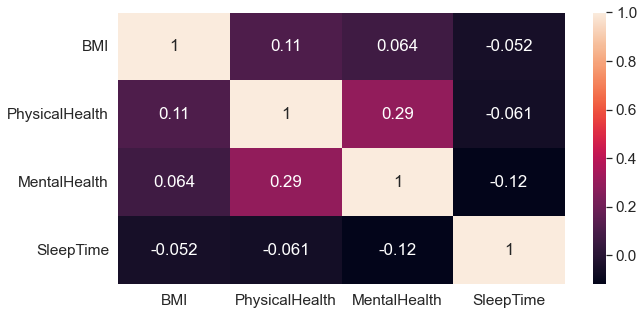

In [9]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(health.corr(), annot=True) #heatmap of correlation
plt.show()

In [10]:
health.select_dtypes("category").columns
yes_no_columns = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
#for i in health.dtypes == "category":
#    print(health[i].value_counts(normalize=True))
health[yes_no_columns].apply(pd.Series.value_counts)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0.0,292422,187887,298018,307726,275385,151990,269653,71838,276923,308016,289976
1.0,27373,131908,21777,12069,44410,167805,40802,247957,42872,11779,29819


## Overview of Categorical Variables Grouped by Heart Disease

For "Sex", male = 0 and female = 1.  For all other variables, no = 0 and yes = 1.

HeartDisease
0               0.914405
1               0.085595
dtype: float64


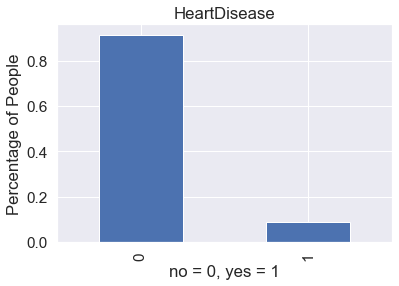

Smoking
0          0.587523
1          0.412477
dtype: float64


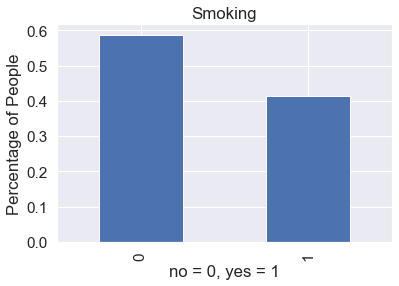

AlcoholDrinking
0                  0.931903
1                  0.068097
dtype: float64


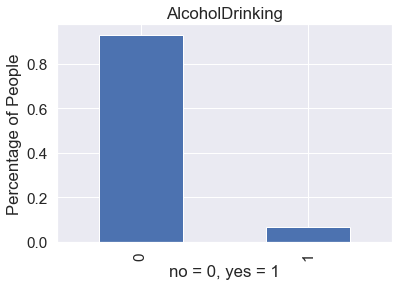

Stroke
0         0.96226
1         0.03774
dtype: float64


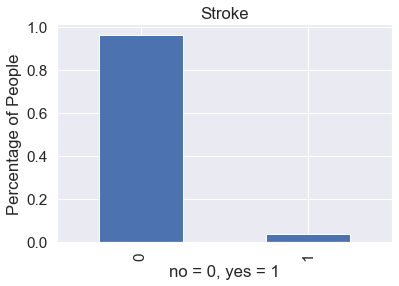

DiffWalking
0              0.86113
1              0.13887
dtype: float64


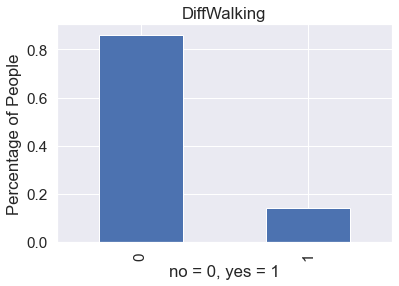

Sex
1      0.524727
0      0.475273
dtype: float64


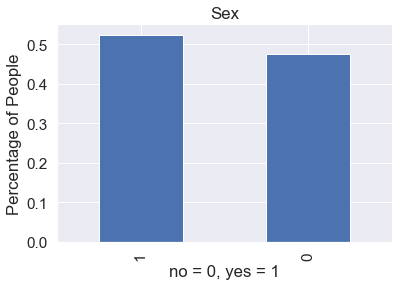

Diabetic
0.0         0.868574
1.0         0.131426
dtype: float64


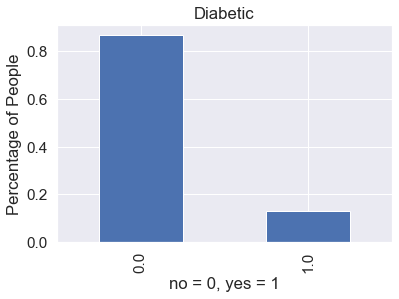

PhysicalActivity
1                   0.775362
0                   0.224638
dtype: float64


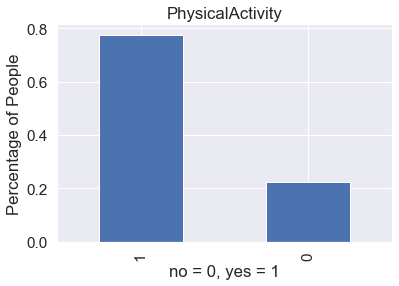

Asthma
0         0.865939
1         0.134061
dtype: float64


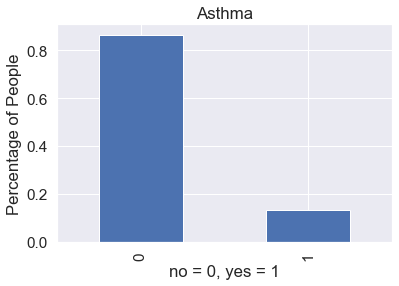

KidneyDisease
0                0.963167
1                0.036833
dtype: float64


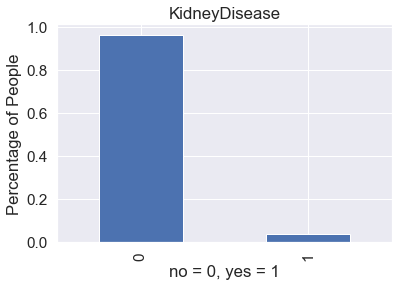

SkinCancer
0             0.906756
1             0.093244
dtype: float64


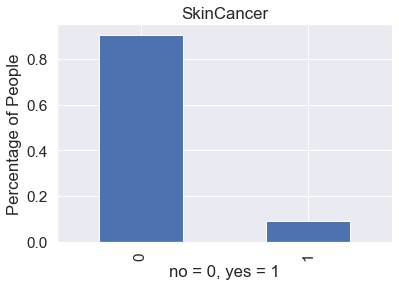

In [11]:
for col in yes_no_columns:
    #print("The percentage of people with " + str(col))
    print(health[[col]].value_counts(normalize=True))
    plt.xticks([0,1],['no','yes'])
    plt.title(col)
    plt.xlabel('no = 0, yes = 1')
    plt.ylabel("Percentage of People")
    health[col].value_counts(normalize=True).plot(kind='bar')
    plt.show()

## BMI VS Heart Disease

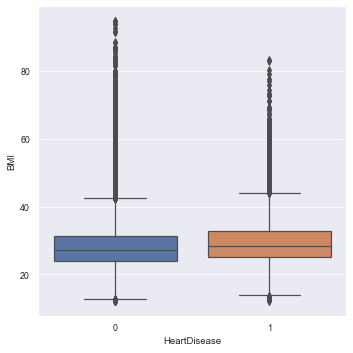

In [12]:
sns.set_context('paper')
sns.catplot(x = 'HeartDisease', y = 'BMI', data = health, kind = 'box')

Is there a significant difference in BMI between those with heart disease and those without?

In [13]:
health.groupby("HeartDisease")['BMI'].describe().T

HeartDisease,0,1
count,292422.000000,27373.000000
mean,28.224658,29.401592
std,6.325660,6.577151
min,12.020000,12.210000
25%,23.890000,25.060000
50%,27.260000,28.340000
75%,31.320000,32.690000
max,94.850000,83.330000


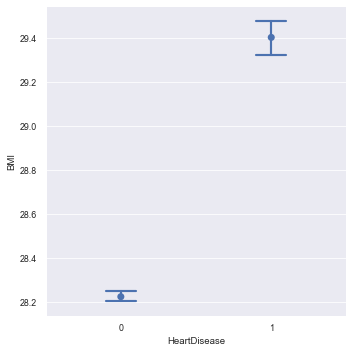

In [14]:
sns.catplot(x = 'HeartDisease', y = 'BMI', data = health, kind = 'point', join = False, capsize = 0.2)

## Sleep Time vs Heart Disease

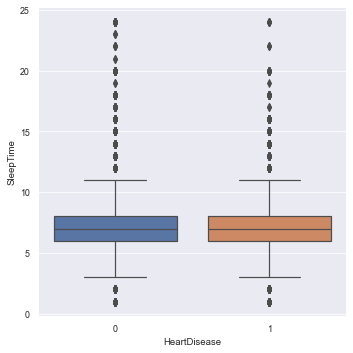

In [15]:
sns.catplot(x = 'HeartDisease', y = 'SleepTime', data = health, kind = 'box')

In [16]:
health.groupby("HeartDisease")['SleepTime'].describe().T

HeartDisease,0,1
count,292422.000000,27373.000000
mean,7.093416,7.136156
std,1.399331,1.780863
min,1.000000,1.000000
25%,6.000000,6.000000
50%,7.000000,7.000000
75%,8.000000,8.000000
max,24.000000,24.000000


## Physical Health vs Heart Disease

Physical health is the number of days (out of 30) that the person did NOT have good physical health

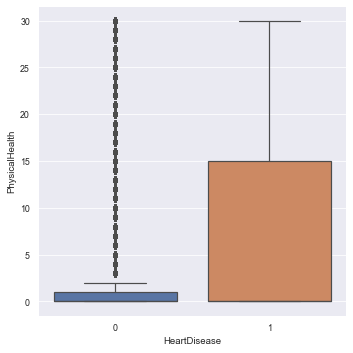

In [17]:
sns.catplot(x = 'HeartDisease', y = 'PhysicalHealth', data = health, kind = 'box')

In [18]:
health.groupby("HeartDisease")['PhysicalHealth'].describe().T

HeartDisease,0,1
count,292422.000000,27373.000000
mean,2.956416,7.808242
std,7.400378,11.487819
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,15.000000
max,30.000000,30.000000


## Mental Health vs Heart Disease

Mental health is the number of days (out of 30) that the person did NOT have good physical health

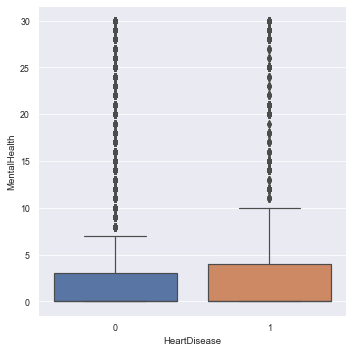

In [19]:
sns.catplot(x = 'HeartDisease', y = 'MentalHealth', data = health, kind = 'box')

In [20]:
health.groupby("HeartDisease")['MentalHealth'].describe().T

HeartDisease,0,1
count,292422.000000,27373.000000
mean,3.828778,4.641764
std,7.828079,9.171932
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3.000000,4.000000
max,30.000000,30.000000


## Gender VS Heart Disease

Text(0.5, 1.0, 'Gender VS Heart Disease')

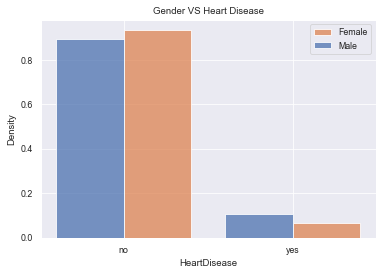

In [21]:
sns.histplot(x = health['HeartDisease'], hue=health['Sex'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(labels=['Female', 'Male'])
plt.title("Gender VS Heart Disease")

In [22]:
# Male = 0, Female = 1
health.groupby("Sex")['HeartDisease'].value_counts(normalize=True)

Sex   
0    0    0.893815
     1    0.106185
1    0    0.933053
     1    0.066947
Name: HeartDisease, dtype: float64

## Smoking VS Heart Disease

Text(0.5, 1.0, 'Smoking VS Heart Disease')

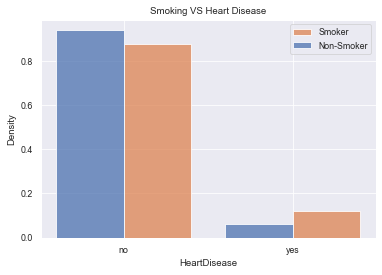

In [23]:
sns.histplot(x = health['HeartDisease'], hue=health['Smoking'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(labels=['Smoker', 'Non-Smoker'])
plt.title("Smoking VS Heart Disease")

In [24]:
health.groupby("Smoking")['HeartDisease'].value_counts(normalize=True)

Smoking   
0        0    0.939666
         1    0.060334
1        0    0.878423
         1    0.121577
Name: HeartDisease, dtype: float64

## Age VS Heart Disease

Text(0.5, 1.0, 'Age VS Heart Disease')

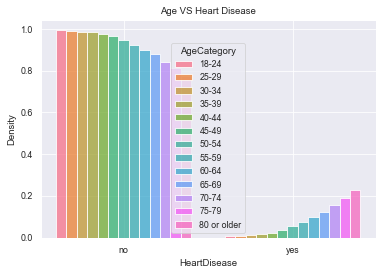

In [25]:
sns.histplot(x = health['HeartDisease'], hue=health['AgeCategory'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
#plt.legend(labels=['Smoker', 'Non-Smoker'])
plt.title("Age VS Heart Disease")

## Stroke VS Heart Disease

Text(0.5, 1.0, 'Stroke VS Heart Disease')

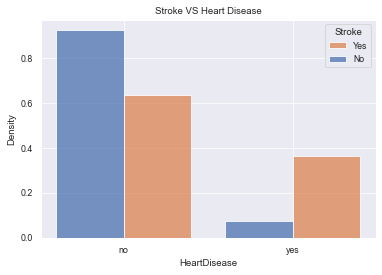

In [26]:
sns.histplot(x = health['HeartDisease'], hue=health['Stroke'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Stroke", labels=['Yes', 'No'])
plt.title("Stroke VS Heart Disease")

In [27]:
health.groupby("Stroke")['HeartDisease'].value_counts(normalize=True)

Stroke   
0       0    0.925310
        1    0.074690
1       0    0.636341
        1    0.363659
Name: HeartDisease, dtype: float64

## Excessive Alcohol vs Heart Disease

Text(0.5, 1.0, 'More than One Drink per Day VS Heart Disease')

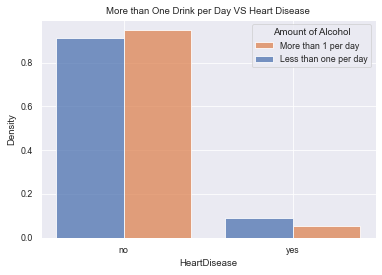

In [28]:
sns.histplot(x = health['HeartDisease'], hue=health['AlcoholDrinking'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Amount of Alcohol", labels=['More than 1 per day', 'Less than one per day'])
plt.title("More than One Drink per Day VS Heart Disease")

In [29]:
health.groupby("AlcoholDrinking")['HeartDisease'].value_counts(normalize=True)

AlcoholDrinking   
0                0    0.911978
                 1    0.088022
1                0    0.947605
                 1    0.052395
Name: HeartDisease, dtype: float64

## Difficulty Walking vs Heart Disease

Text(0.5, 1.0, 'Difficulty Walking VS Heart Disease')

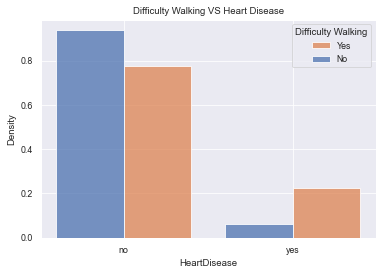

In [30]:
sns.histplot(x = health['HeartDisease'], hue=health['DiffWalking'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Difficulty Walking", labels=['Yes', 'No'])
plt.title("Difficulty Walking VS Heart Disease")

In [31]:
health.groupby("DiffWalking")['HeartDisease'].value_counts(normalize=True)

DiffWalking   
0            0    0.937015
             1    0.062985
1            0    0.774195
             1    0.225805
Name: HeartDisease, dtype: float64

## Diabetes vs Heart Disease

Text(0.5, 1.0, 'Diabetese VS Heart Disease')

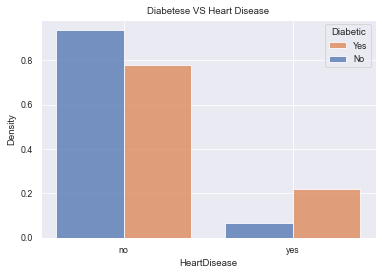

In [32]:
sns.histplot(x = health['HeartDisease'], hue=health['Diabetic'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Diabetic", labels=['Yes', 'No'])
plt.title("Diabetese VS Heart Disease")

In [33]:
health.groupby("Diabetic")['HeartDisease'].value_counts(normalize=True)

Diabetic   
0.0       0    0.935031
          1    0.064969
1.0       0    0.780476
          1    0.219524
Name: HeartDisease, dtype: float64

## General Health Rating vs Heart Disease

Text(0.5, 1.0, 'Health Rating VS Heart Disease')

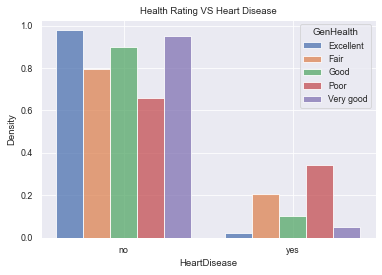

In [34]:
sns.histplot(x = health['HeartDisease'], hue=health['GenHealth'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
#plt.legend(title = "Health Rating")
plt.title("Health Rating VS Heart Disease")

In [35]:
health.groupby("GenHealth")['HeartDisease'].value_counts(normalize=True)

GenHealth   
Excellent  0    0.977559
           1    0.022441
Fair       0    0.795715
           1    0.204285
Good       0    0.897368
           1    0.102632
Poor       0    0.658960
           1    0.341040
Very good  0    0.952739
           1    0.047261
Name: HeartDisease, dtype: float64

## Race VS Heart Disease

Text(0.5, 1.0, 'Race VS Heart Disease')

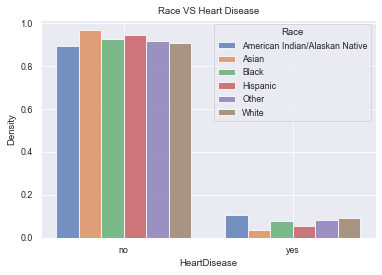

In [36]:
sns.histplot(x = health['HeartDisease'], hue=health['Race'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.title("Race VS Heart Disease")

In [37]:
health.groupby("Race")['HeartDisease'].value_counts(normalize=True)

Race                             
American Indian/Alaskan Native  0    0.895809
                                1    0.104191
Asian                           0    0.967030
                                1    0.032970
Black                           0    0.924626
                                1    0.075374
Hispanic                        0    0.947424
                                1    0.052576
Other                           0    0.918924
                                1    0.081076
White                           0    0.908214
                                1    0.091786
Name: HeartDisease, dtype: float64

## Asthma VS Heart Disease

Text(0.5, 1.0, 'Asthma VS Heart Disease')

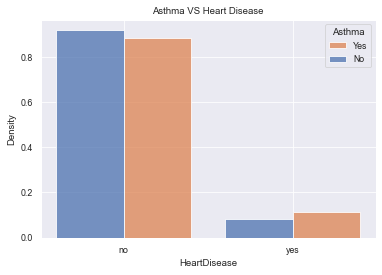

In [38]:
sns.histplot(x = health['HeartDisease'], hue=health['Asthma'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Asthma", labels=['Yes', 'No'])
plt.title("Asthma VS Heart Disease")

In [39]:
health.groupby("Asthma")['HeartDisease'].value_counts(normalize=True)

Asthma   
0       0    0.918967
        1    0.081033
1       0    0.884937
        1    0.115063
Name: HeartDisease, dtype: float64

## Kidney Disease VS Heart Disease

Text(0.5, 1.0, 'Kidney Disease VS Heart Disease')

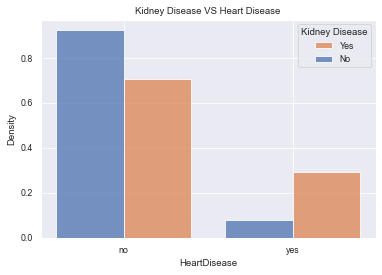

In [40]:
sns.histplot(x = health['HeartDisease'], hue=health['KidneyDisease'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Kidney Disease", labels=['Yes', 'No'])
plt.title("Kidney Disease VS Heart Disease")

In [41]:
health.groupby("KidneyDisease")['HeartDisease'].value_counts(normalize=True)

KidneyDisease   
0              0    0.922348
               1    0.077652
1              0    0.706681
               1    0.293319
Name: HeartDisease, dtype: float64

## Skin Cancer VS Heart Disease

Text(0.5, 1.0, 'Skin Cancer VS Heart Disease')

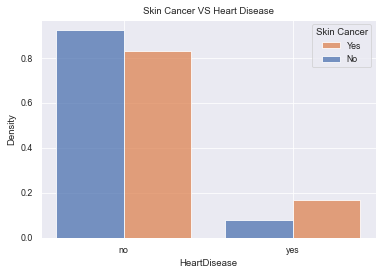

In [42]:
sns.histplot(x = health['HeartDisease'], hue=health['SkinCancer'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)
plt.xticks([0, 1], ['no','yes'])
plt.legend(title = "Skin Cancer", labels=['Yes', 'No'])
plt.title("Skin Cancer VS Heart Disease")

In [43]:
health.groupby("SkinCancer")['HeartDisease'].value_counts(normalize=True)

SkinCancer   
0           0    0.922776
            1    0.077224
1           0    0.832992
            1    0.167008
Name: HeartDisease, dtype: float64

## Summary

What we've learned is that people with Heart Disease appear to have a higher rate of stroke and diabetes, to be older, to smoke more, to be more often male, to have more bad physical health days a month, to have a higher rate of poor or fair health, to drink less alcohol, to have more difficulty walking, and to have a higher BMI.  They also appear to have higher rates of skin cancer, kidney disease, and asthma.  Asians have the least amount of Heart Disease at 3%.